In [1]:
%pylab inline
import pandas as pd
import programas as pg
from scipy.ndimage import convolve
from scipy.signal import fftconvolve

Populating the interactive namespace from numpy and matplotlib


# **QUE HACER** : *leer documentacion del numerical*
### la idea es hacer la transformada de la simu y de la top hat con **mucho padding**
### chequear 

In [3]:
field = np.load('/mnt/projects/bias_mock/rhodm_eul.npy')

In [4]:
# Calcula la transformada de Fourier tridimensional
transformada = np.fft.fftn(field)

# Puedes calcular también la transformada inversa para recuperar el campo original
campo_recuperado = np.fft.ifftn(transformada)

/home/arodriguez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/home/arodriguez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/arodriguez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/arodriguez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


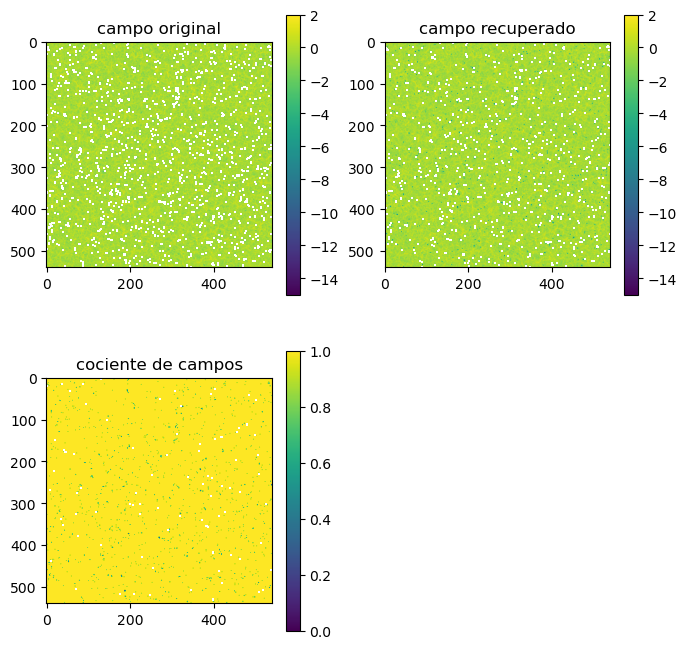

In [5]:
plt.figure(figsize=(8,8))

plt.subplot(221)
plt.title('campo original')
plt.imshow(np.log10(field[0,:,:]),vmin=-15,vmax=2)
plt.colorbar()

plt.subplot(222)
plt.title('campo recuperado')
plt.imshow(np.log10(campo_recuperado.real[0,:,:]),vmin=-15,vmax=2)
plt.colorbar()

plt.subplot(223)
plt.title('cociente de campos')
plt.imshow(field[0,:,:]/campo_recuperado.real[0,:,:])
plt.colorbar()

## Ahora voy a convolucionar el campo

In [16]:
# Campo 3D y kernel de convolución
campo = field
#kernel = np.ones((20, 20, 20))
#kernel = kernel/np.sum(kernel)# Kernel de convolución simple, por ejemplo

nbines = 60
kernel = pg.generate_circle_matrix_3d(540, nbines, dim=3)

campo_extendido = np.pad(campo,  [(nbines, nbines)]*3, mode='wrap')


convolucion = fftconvolve(campo_extendido, kernel, mode='same')

In [19]:
convolucion.shape

(660, 660, 660)

In [21]:
convolucion[nbines:nbines+540,nbines:nbines+540,nbines:nbines+540].shape

(540, 540, 540)

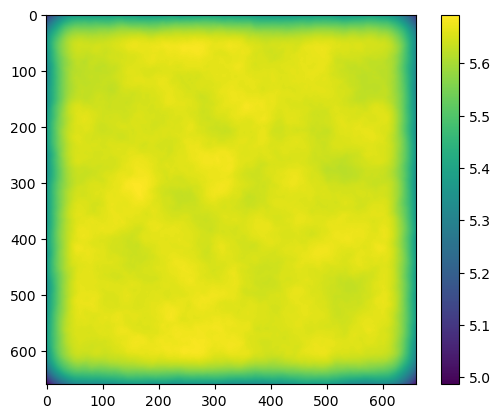

In [18]:
plt.imshow(np.log10(convolucion[0,:,:]))
plt.colorbar()

In [15]:
np.min(convolucion[0,:,:])

96978.54343693906

In [22]:
stop

NameError: name 'stop' is not defined

In [22]:
%%time
nbines = 8
Dfields = []

# Extender el campo periódico para simular la periodicidad
#campo_extendido = np.pad(field,  [(nbines, nbines)]*3, mode='wrap')
campo = field
#print('campo extendido shape:',campo_extendido.shape)

for i in range(nbines):
    print('bin:',i)
    campo_extendido = np.pad(campo,  [(i, i)]*3, mode='wrap')

    kernel_radio = i + 1
    #kernel = np.ones((ksize, ksize, ksize)) / ksize**3
    kernel = pg.generate_circle_matrix_3d(540, kernel_radio, dim=3)
    kernel = kernel/np.sum(kernel)

    # Realizar la convolución
    campo_convolucionado = fftconvolve(campo_extendido, kernel, mode='same')
    
    # Realizar la convolución
    #campo_convolucionado = fftconvolve(campo, kernel, mode='same')
    #campo_recuperado = np.fft.ifftn(campo_convolucionado).real  
    
    print('campo recuperado:',campo_recuperado.shape)
    Dfields.append(campo_convolucionado[i:i+540,i:i+540,i:i+540])

bin: 0
campo recuperado: (540, 540, 540)
bin: 1
campo recuperado: (540, 540, 540)
bin: 2
campo recuperado: (540, 540, 540)
bin: 3
campo recuperado: (540, 540, 540)
bin: 4
campo recuperado: (540, 540, 540)
bin: 5
campo recuperado: (540, 540, 540)
bin: 6
campo recuperado: (540, 540, 540)
bin: 7
campo recuperado: (540, 540, 540)
CPU times: user 13min 51s, sys: 50.7 s, total: 14min 42s
Wall time: 15min 47s


/home/arodriguez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


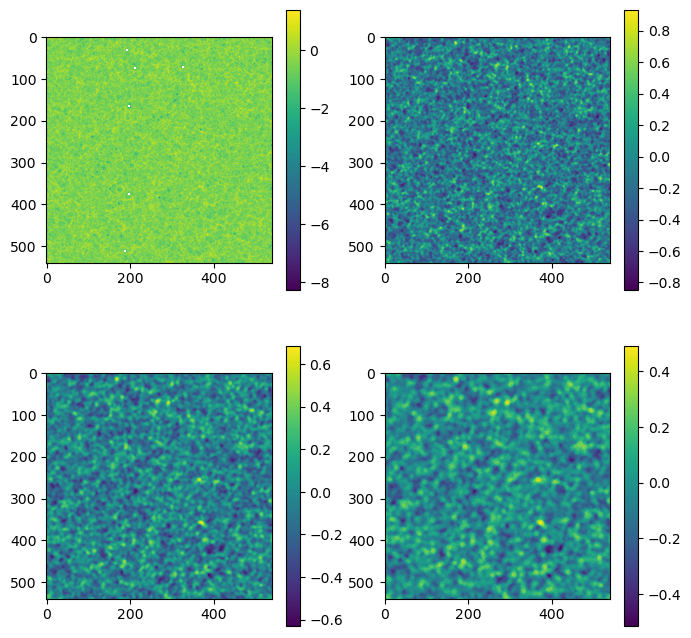

In [43]:
plt.figure(figsize=(8,8))

plt.subplot(221)
plt.imshow(np.log10(Dfields[0][0,:,:]))
plt.colorbar()

plt.subplot(222)
plt.imshow(np.log10(Dfields[2][0,:,:]))
plt.colorbar()

plt.subplot(223)
plt.imshow(np.log10(Dfields[4][0,:,:]))
plt.colorbar()

plt.subplot(224)
plt.imshow(np.log10(Dfields[6][0,:,:]))
plt.colorbar()

# Comparo el perfil de un void real con el recuperado aca

In [58]:
v = np.loadtxt('sphvds_raul-0.8.dat')

void_id = 613
x = v[void_id,2]
y = v[void_id,3]
z = v[void_id,4]
rvoid = v[void_id,1]
print(rvoid)

lbox = 1440
fbines = field.shape[0]
fbin_size = lbox/fbines

nbinx = int(x/fbin_size) #+ nbines
nbiny = int(y/fbin_size) #+ nbines
nbinz = int(z/fbin_size) #+ nbines

18.09368324279785


In [59]:
Dfields[6].shape

(540, 540, 540)

In [66]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
profile = []
for i in range(nbines):
    profile.append(Dfields[i][nbinx,nbiny,nbinz])

In [61]:
distances = (np.linspace(0,nbines,nbines+1)*fbin_size)[1:]

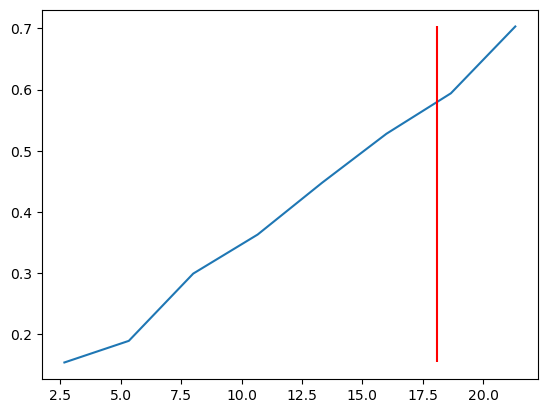

In [62]:
plt.plot(distances,profile)
plt.vlines(x=rvoid,ymin=np.min(profile),ymax=np.max(profile),color='red')

In [63]:
sel, = np.where(v[:,1]<16)

15.00004291534424

/home/arodriguez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


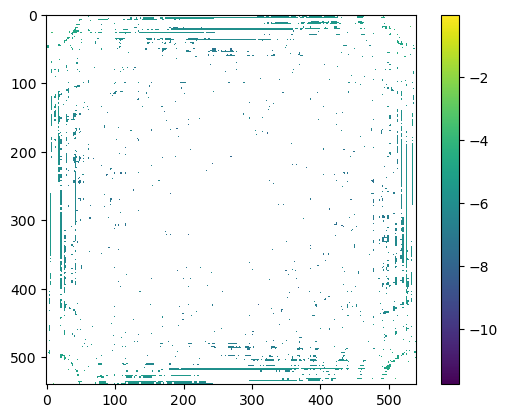

In [55]:
plt.imshow(np.log10(Dfields[7][0,:,:]))
plt.colorbar()

In [78]:
from scipy.signal import fftconvolve

# Campo periódico y kernel de convolución
campo_periodico = field  # Campo periódico de ejemplo
kernel = np.ones((3, 3, 3)) / 27  # Kernel de convolución simple, por ejemplo

# Extender el campo periódico para simular la periodicidad
campo_extendido = np.pad(field,  [(nbines, nbines)]*3, mode='wrap')

# Realizar la convolución
campo_convolucionado = fftconvolve(campo_extendido, kernel, mode='valid')

In [79]:
campo_extendido.shape

(560, 560, 560)

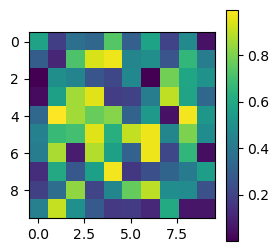

In [75]:
plt.figure(figsize=(3,3))
plt.imshow(campo_periodico)
plt.colorbar()

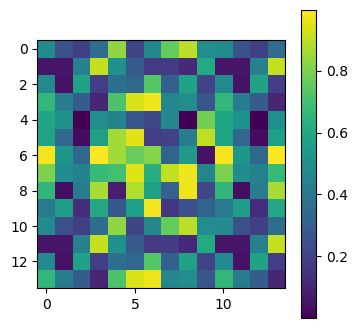

In [76]:
plt.figure(figsize=(4,4))
plt.imshow(campo_extendido)
plt.colorbar()

## Top Hat Kernel

In [22]:
import numpy as np

def generate_circle(radius, center, grid_size):
    circle = np.zeros(grid_size, dtype=bool)
    cx, cy = center
    x = radius
    y = 0
    err = 0

    while x >= y:
        circle[cx + x, cy + y] = True
        circle[cx + y, cy + x] = True
        circle[cx - y, cy + x] = True
        circle[cx - x, cy + y] = True
        circle[cx - x, cy - y] = True
        circle[cx - y, cy - x] = True
        circle[cx + y, cy - x] = True
        circle[cx + x, cy - y] = True

        y += 1
        err += 1 + 2*y
        if 2*(err - x) + 1 > 0:
            x -= 1
            err += 1 - 2*x

    return circle

# Ejemplo de uso:
radius = 3
center = (5, 5)
grid_size = (10, 10)

circle = generate_circle(radius, center, grid_size)
print(circle.astype(int))

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 1 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [44]:
import numpy as np

def generate_circle_matrix(n, r):
    # Crear una matriz cuadrada de ceros de tamaño n x n
    matrix = np.zeros((n, n))

    # Calcular el centro de la matriz
    center = (n - 1) / 2

    # Crear una cuadrícula de coordenadas
    X, Y = np.meshgrid(np.arange(n), np.arange(n))

    # Calcular la distancia desde cada punto al centro
    distance = np.sqrt((X - center)**2 + (Y - center)**2)

    # Asignar 1 a los puntos dentro del círculo central
    matrix[distance <= r] = 1

    return matrix

# Tamaño de la matriz (número impar para tener un centro definido)
n = 11
# Radio del círculo
r = 5

# Generar la matriz con el círculo central de unos
matrix = generate_circle_matrix(n, r)

# Imprimir la matriz
print(matrix)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [58]:
import numpy as np

def generate_circle_matrix_3d(n, r, dim):
    # Crear una matriz tridimensional de ceros de tamaño n x n x n
    matrix = np.zeros((n,) * dim)

    # Calcular el centro de la matriz
    center = (n - 1) / 2

    # Crear una cuadrícula de coordenadas
    coordinates = np.meshgrid(*[np.arange(n) for _ in range(dim)], indexing='ij')

    # Calcular la distancia desde cada punto al centro
    distance = np.sqrt(np.sum((coord - center)**2 for coord in coordinates))

    # Asignar 1 a los puntos dentro del círculo central
    matrix[distance <= r] = 1

    return matrix

# Tamaño de la matriz (número impar para tener un centro definido)
n = 9
# Radio del círculo
r = 2
# Número de dimensiones
dim = 3

# Generar la matriz con el círculo central de unos
matrix_3d = generate_circle_matrix_3d(n, r, dim)

/home/arodriguez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
